In [ ]:
'''
Title: US_Census
Date:20th June,2020
Objective: To Read adult.csv, clean the data and predict the income range(Classification)
Author: Srikanth
'''

In [259]:
import pandas as pd
import numpy as np
import seaborn as sns

# 1. Data Cleaning

In [270]:
census=pd.read_csv("adult.csv")

In [158]:
census.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,#NAME?,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
census.shape

(5000, 15)

In [5]:
census.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             5000 non-null   object
 1   workclass       5000 non-null   object
 2   fnlwgt          5000 non-null   object
 3   education       5000 non-null   object
 4   education_num   5000 non-null   object
 5   marital_status  5000 non-null   object
 6   occupation      5000 non-null   object
 7   relationship    5000 non-null   object
 8   race            5000 non-null   object
 9   sex             5000 non-null   object
 10  capital_gain    5000 non-null   int64 
 11  capital_loss    5000 non-null   int64 
 12  hours_per_week  5000 non-null   int64 
 13  native_country  5000 non-null   object
 14  income          5000 non-null   object
dtypes: int64(3), object(12)
memory usage: 586.1+ KB


In [10]:
census.describe()

,capital_gain,capital_loss,hours_per_week
count,5000.000000,5000.000000,5000.000000
mean,1033.640200,93.696800,40.519000
std,7051.802077,410.801418,12.109193
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,40.000000
50%,0.000000,0.000000,40.000000
75%,0.000000,0.000000,45.000000
max,99999.000000,2547.000000,99.000000


In [ ]:
'''pd.DataFrame(np.where(census=='State-gov'))
dum=pd.DataFrame(np.where((census == '#NAME?'),np.nan,census))
dum.isna().sum()
dum=pd.DataFrame(np.where((dum == '?'),np.nan,dum))
dum.isna().sum()
'''

In [17]:
print('Age \n',census['age'].unique())

Age 
 ['39' '50' '38' '53' '28' '37' '49' '52' '31' '42' '30' '23' '32' '40'
 '34' '#NAME?' '43' '54' '35' '59' '56' '19' '20' '45' '22' '48' '21' '24'
 '25' '57' '44' '41' '29' '18' '47' '46' '36' '79' '27' '67' '33' '76'
 '17' '55' '61' '70' '64' '71' '68' '66' '51' '58' '26' '60' '90' '75'
 '65' '77' '62' '63' '80' '72' '74' '69' '73' '81' '78' '88' '82']


In [30]:
print('Age \n',census['age'].value_counts().sort_index())

Age 
 #NAME?     48
17         60
18         76
19        109
20        128
         ... 
80          3
81          4
82          1
88          1
90          7
Name: age, Length: 69, dtype: int64


In [20]:
print('workclass \n',census['workclass'].value_counts())
print('fnlwgt           \n',census['fnlwgt'].value_counts())
print('education        \n',census['education'].value_counts())


workclass 
 Private             3435
Self-emp-not-inc     383
?                    331
Local-gov            329
State-gov            193
Self-emp-inc         182
Federal-gov          146
Without-pay            1
Name: workclass, dtype: int64
fnlwgt           
 #NAME?    107
123983      5
163003      4
94235       4
111567      4
         ... 
291429      1
198632      1
189346      1
292472      1
154165      1
Name: fnlwgt, Length: 4507, dtype: int64
education        
 HS-grad         1597
Some-college    1114
Bachelors        819
Masters          251
Assoc-voc        215
11th             198
Assoc-acdm       163
10th             144
7th-8th           98
Prof-school       88
9th               74
?                 57
Doctorate         55
12th              55
5th-6th           43
1st-4th           22
Preschool          7
Name: education, dtype: int64


In [24]:
print('education_num \n',census['education_num'].value_counts())
print('marital_status           \n',census['marital_status'].value_counts())
print('Occupation        \n',census['occupation'].value_counts())

education_num 
 9         1597
10        1114
13         819
14         251
11         215
7          198
12         163
6          144
4           98
15          88
5           74
#NAME?      57
16          55
8           55
3           43
2           22
1            7
Name: education_num, dtype: int64
marital_status           
 Married-civ-spouse       2270
Never-married            1659
Divorced                  682
Widowed                   160
Separated                 158
Married-spouse-absent      66
Married-AF-spouse           5
Name: marital_status, dtype: int64
Occupation        
 Prof-specialty       625
Craft-repair         619
Exec-managerial      618
Sales                588
Adm-clerical         576
Other-service        495
?                    331
Machine-op-inspct    312
Transport-moving     247
Handlers-cleaners    196
Farming-fishing      143
Tech-support         140
Protective-serv       90
Priv-house-serv       18
Armed-Forces           2
Name: occupation, dtype: int

In [23]:
print('relationship     \n',census['relationship'].value_counts())
print('race           \n',census['race'].value_counts())
print('sex        \n',census['sex'].value_counts())

relationship     
 Husband           2001
Not-in-family     1292
Own-child          770
Unmarried          544
Wife               245
Other-relative     148
Name: relationship, dtype: int64
race           
 White                 4021
Black                  493
#NAME?                 264
Asian-Pac-Islander     145
Amer-Indian-Eskimo      48
Other                   29
Name: race, dtype: int64
sex        
 Male      3332
Female    1621
#NAME?      47
Name: sex, dtype: int64


In [26]:
print('capital_gain         \n',census['capital_gain'].value_counts())
print('capital_loss           \n',census['capital_loss'].value_counts())
print('hours_per_week          \n',census['hours_per_week'].value_counts().sort_index())

capital_gain         
 0        4579
15024      65
7688       48
7298       36
99999      22
         ... 
4416        1
114         1
5455        1
4931        1
6497        1
Name: capital_gain, Length: 83, dtype: int64
capital_loss           
 0       4745
1902      40
1977      30
1887      24
2415      10
1485       9
1848       9
1590       7
1741       7
1762       6
1719       6
1876       6
1672       6
1564       6
1669       5
1628       5
1980       5
1740       5
2392       4
2002       4
1408       4
2339       4
2001       3
2179       3
1579       3
2258       3
1340       3
625        2
2352       2
1721       2
1504       2
2051       2
1380       2
1602       2
2377       2
2206       2
1816       2
1668       1
1092       1
880        1
2205       1
1539       1
213        1
2444       1
653        1
419        1
1651       1
2547       1
1138       1
1594       1
1726       1
2042       1
2174       1
2238       1
1573       1
Name: capital_loss, dtype: int64
hours

In [27]:
print('native_country       \n',census['native_country'].value_counts())
print('income           \n',census['income'].value_counts())

native_country       
 United-States                 4465
Mexico                         104
?                               97
Canada                          28
Philippines                     22
Germany                         22
Puerto-Rico                     16
England                         16
El-Salvador                     16
Jamaica                         15
China                           15
Cuba                            14
Dominican-Republic              13
Italy                           12
India                           12
Iran                            11
Guatemala                       10
Vietnam                         10
Taiwan                          10
Poland                           9
Japan                            9
South                            9
Portugal                         7
Haiti                            6
Greece                           6
Columbia                         5
Nicaragua                        5
Trinadad&Tobago                 

In [ ]:
Native Country: ? - 48
race: #NAME?  - 264
sex:#NAME?    - 47
occupation:? 331
education_num:  #NAME?- 57
    education ? - 57
  fnlwgt-#NAME? -107
workclass- ? -331
Age - #NAME?- 48

In [271]:
census=census.replace('?',np.nan)

In [272]:
census.replace('#NAME?',np.nan,inplace=True)

In [273]:
census.isna().sum()

age                48
workclass         331
fnlwgt            107
education          57
education_num      57
marital_status      0
occupation        331
relationship        0
race              264
sex                47
capital_gain        0
capital_loss        0
hours_per_week      0
native_country     97
income              0
dtype: int64

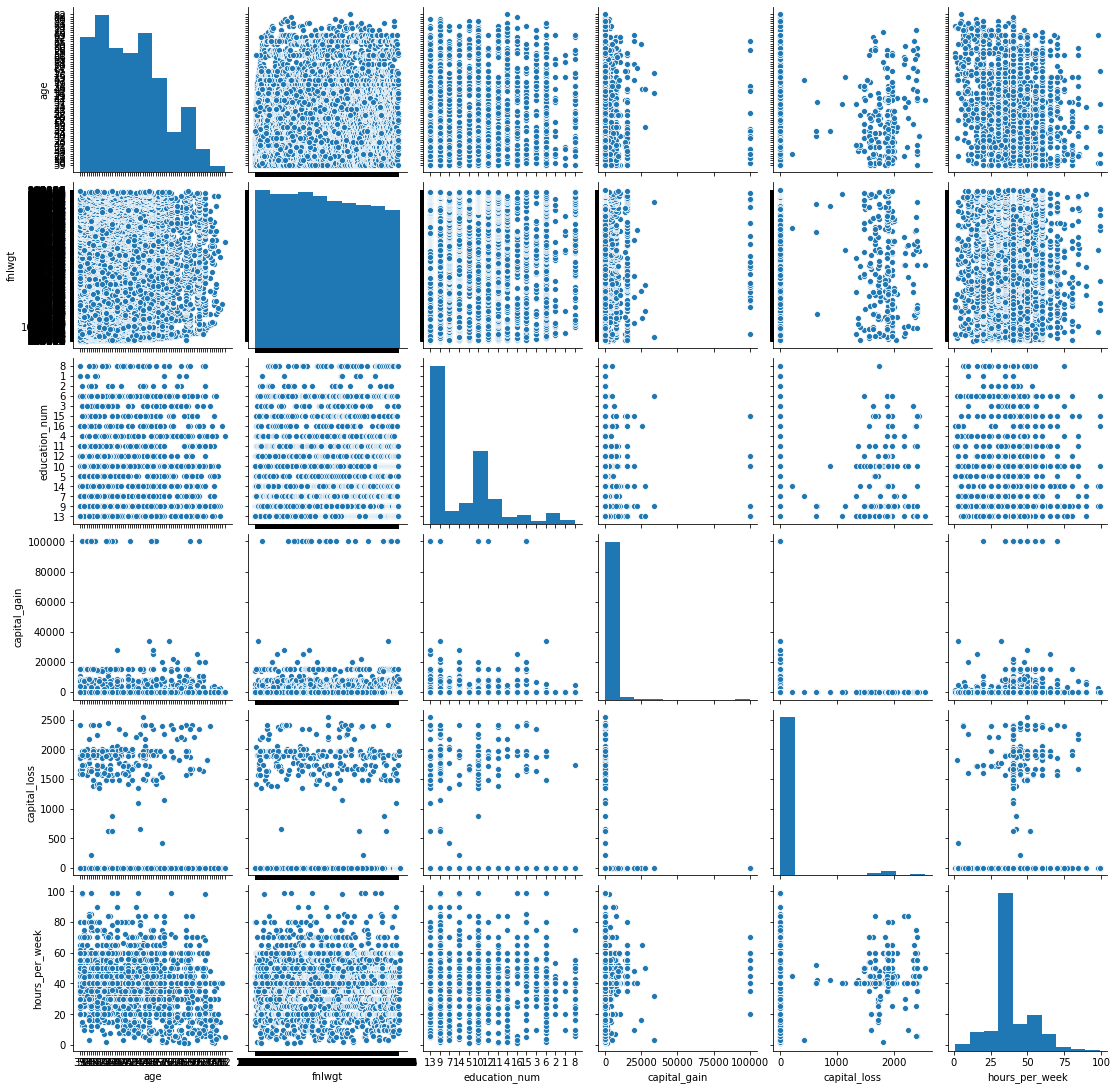

In [51]:
sns.pairplot(census)

In [52]:
census.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,NaN,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [206]:
census[census.isna().any(axis=1)]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,NaN,0,0,40,United-States,<=50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
16,NaN,Self-emp-not-inc,NaN,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,<=50K
20,NaN,Private,193524,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958,20,NaN,293136,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,35,United-States,<=50K
4970,51,NaN,203953,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,>50K
4980,45,NaN,144354,9th,5,Separated,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
4982,22,NaN,99543,Some-college,10,Never-married,NaN,Own-child,NaN,Male,0,0,20,United-States,<=50K


Filling mean age

In [274]:
census['age']=census['age'].astype('float')

In [275]:
census['age']=census['age'].fillna(census['age'].mean())


In [276]:
census['fnlwgt']=census[['fnlwgt']].astype(np.float)
census['education_num']=census[['education_num']].astype(np.float)

In [81]:
'''
DOES NOT WORK
census['sex']= census['relationship'].apply(lambda x: x.fillna(fillage))
def fillage(x):
    if x=='Husband':
        return 'Male'
    if x=='Wife':
        return 'Female''''

Filling Sex based on relationship

In [125]:
'''census['sex']=np.where(census['relationship']=='Husband','Male',census['sex'])
census['sex']=np.where(census['relationship']=='Wife','Female',census['sex'])'''

In [279]:
census['sex']=np.where(census.relationship=='Husband','Male', census.sex)
census['sex']=np.where(census.relationship=='Wife','Female', census.sex)

Filling mean of fnlwgt            

In [280]:
census['fnlwgt']=census['fnlwgt'].fillna(census['fnlwgt'].mean())

Both workclass & Occupation are NAN for same columns so let us add 'Other category'

In [281]:
census['occupation']=census['occupation'].fillna('others')

In [282]:
census['workclass']=census['workclass'].fillna('others')

Filling Native Country, Race,Education, Eduction_num with the highest occurence

In [283]:
census['native_country'].mode()[0]

'United-States'

In [284]:
census['native_country']=census['native_country'].fillna(census['native_country'].mode()[0])

In [285]:
census['race']=census['race'].fillna(census['race'].mode()[0])

In [286]:
census['education']=census['education'].fillna(census['education'].mode()[0])

In [287]:
census['education_num']=census['education_num'].fillna(census['education_num'].mode()[0])

In [288]:
census.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
education_num      0
marital_status     0
occupation         0
relationship       0
race               0
sex               23
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64

In [289]:
census['sex'].fillna(census['sex'].mode()[0],inplace=True)

In [290]:
census.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [291]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   workclass       5000 non-null   object 
 2   fnlwgt          5000 non-null   float64
 3   education       5000 non-null   object 
 4   education_num   5000 non-null   float64
 5   marital_status  5000 non-null   object 
 6   occupation      5000 non-null   object 
 7   relationship    5000 non-null   object 
 8   race            5000 non-null   object 
 9   sex             5000 non-null   object 
 10  capital_gain    5000 non-null   int64  
 11  capital_loss    5000 non-null   int64  
 12  hours_per_week  5000 non-null   int64  
 13  native_country  5000 non-null   object 
 14  income          5000 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 586.1+ KB


# 2. Encoding the data

In [293]:
from sklearn.preprocessing import LabelEncoder

In [294]:
labelencoder=LabelEncoder()

In [295]:
census['workclass']=labelencoder.fit_transform(census['workclass'])

In [296]:
census['education']=labelencoder.fit_transform(census['education'])
census['marital_status']=labelencoder.fit_transform(census['marital_status'])
census['occupation']=labelencoder.fit_transform(census['occupation'])
census['relationship']=labelencoder.fit_transform(census['relationship'])
census['race']=labelencoder.fit_transform(census['race'])
census['sex']=labelencoder.fit_transform(census['sex'])
census['native_country']=labelencoder.fit_transform(census['native_country'])


In [297]:
census.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39.0,5,77516.0,9,13.0,4,0,1,4,1,2174,0,40,36,<=50K
1,50.0,4,83311.0,9,13.0,2,3,0,4,1,0,0,13,36,<=50K
2,38.0,2,215646.0,11,9.0,0,5,1,4,1,0,0,40,36,<=50K
3,53.0,2,234721.0,1,7.0,2,5,0,2,1,0,0,40,36,<=50K
4,28.0,2,338409.0,9,13.0,2,9,5,2,0,0,0,40,4,<=50K


In [298]:
census['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [299]:
census.corr()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
age,1.000000,0.052137,-0.080141,-0.034191,0.017608,-0.246211,-0.007341,-0.255283,0.028032,0.074466,0.064207,0.056739,0.040624,0.021031
workclass,0.052137,1.000000,-0.020230,-0.013727,-0.033709,0.053411,0.366635,0.025925,0.022484,-0.001532,0.005610,-0.033717,-0.140873,0.005447
fnlwgt,-0.080141,-0.020230,1.000000,-0.047598,-0.058960,0.042442,0.011975,0.015335,-0.013165,0.035024,-0.000381,-0.004216,-0.006443,-0.085710
education,-0.034191,-0.013727,-0.047598,1.000000,0.356414,-0.019434,-0.038238,-0.000262,0.026731,-0.030878,0.034537,0.022254,0.045411,0.076308
education_num,0.017608,-0.033709,-0.058960,0.356414,1.000000,-0.053710,0.044132,-0.093167,0.038714,0.019361,0.113737,0.095279,0.164671,0.054577
marital_status,-0.246211,0.053411,0.042442,-0.019434,-0.053710,1.000000,0.062735,0.174785,-0.070932,-0.103361,-0.049624,-0.036571,-0.205064,-0.005794
occupation,-0.007341,0.366635,0.011975,-0.038238,0.044132,0.062735,1.000000,-0.012617,-0.008043,0.031496,0.015979,-0.012039,-0.071576,-0.010076
relationship,-0.255283,0.025925,0.015335,-0.000262,-0.093167,0.174785,-0.012617,1.000000,-0.116300,-0.566560,-0.058528,-0.057623,-0.257155,-0.014331
race,0.028032,0.022484,-0.013165,0.026731,0.038714,-0.070932,-0.008043,-0.116300,1.000000,0.083319,0.012900,0.025700,0.045562,0.108384
sex,0.074466,-0.001532,0.035024,-0.030878,0.019361,-0.103361,0.031496,-0.566560,0.083319,1.000000,0.043722,0.062198,0.229354,0.002528


In [309]:
census_encode=census

In [337]:
census_one_hot=pd.get_dummies(census[['workclass','education','marital_status','occupation','relationship','race','sex','native_country']])

In [338]:
census_one_hot_final=pd.concat([census_one_hot,census[['age','fnlwgt','education_num','capital_gain','capital_loss',
                                                      'hours_per_week','income']]],axis=1)

# 3.Standardizing the Data

In [340]:
from sklearn.preprocessing import StandardScaler

In [341]:
scale=StandardScaler()

In [317]:
census_encode_scale=scale.fit_transform(census_encode.drop("income",axis=1))

One hot

In [344]:
onehotscaled=scale.fit_transform(census_one_hot_final.drop('income',axis=1))

# 4. Model Building

## a) Train Test Split

In [318]:
X=census_encode_scale

In [319]:
X

array([[ 0.03059961,  1.65146906, -1.07628445, ..., -0.22810576,
        -0.04286428,  0.2679564 ],
       [ 0.84447761,  0.98742842, -1.02131253, ..., -0.22810576,
        -2.27279814,  0.2679564 ],
       [-0.0433893 , -0.34065285,  0.2340299 , ..., -0.22810576,
        -0.04286428,  0.2679564 ],
       ...,
       [ 0.62251088,  0.32338779,  0.20058193, ..., -0.22810576,
        -0.04286428,  0.2679564 ],
       [ 0.        , -0.34065285,  0.52083251, ..., -0.22810576,
         1.60893857,  0.2679564 ],
       [ 1.43638888, -1.00469348, -1.29037614, ..., -0.22810576,
         1.19598786,  0.2679564 ]])

In [321]:
from sklearn.model_selection import train_test_split

In [322]:
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X, census_encode['income'], test_size=0.2, random_state=101)

## b) Logistic Regression 

In [323]:
from sklearn.linear_model import LogisticRegression

In [324]:
logistic= LogisticRegression()

In [325]:
logistic.fit(X_train_LR,y_train_LR)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [326]:
logistic.coef_

array([[ 0.56759524, -0.1660569 ,  0.00621786, -0.00950065,  0.79618005,
        -0.35393918, -0.01333529, -0.08316113,  0.06284303,  0.37247483,
         1.88318717,  0.25814943,  0.44374354,  0.04563544]])

In [327]:
logistic.intercept_

array([-1.509809])

In [328]:
predict_LR=logistic.predict(X_test_LR)

In [334]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [331]:
print(accuracy_score(y_test_LR,predict_LR))

0.805


In [332]:
print(confusion_matrix(y_test_LR,predict_LR))

[[710  45]
 [150  95]]


In [335]:
print(classification_report(y_test_LR,predict_LR))


              precision    recall  f1-score   support

       <=50K       0.83      0.94      0.88       755
        >50K       0.68      0.39      0.49       245

    accuracy                           0.81      1000
   macro avg       0.75      0.66      0.69      1000
weighted avg       0.79      0.81      0.78      1000



## c) One hot Logistic Regression

In [347]:
X_train_LRO, X_test_LRO, y_train_LRO, y_test_LRO = train_test_split(X, census['income'], test_size=0.2, random_state=101)

In [349]:
logistic1=LogisticRegression()

In [350]:
logistic1.fit(X_train_LRO,y_train_LRO)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [351]:
logistic1.coef_

array([[ 0.56759524, -0.1660569 ,  0.00621786, -0.00950065,  0.79618005,
        -0.35393918, -0.01333529, -0.08316113,  0.06284303,  0.37247483,
         1.88318717,  0.25814943,  0.44374354,  0.04563544]])

In [352]:
logistic1.intercept_

array([-1.509809])

In [354]:
predict_LRO=logistic.predict(X_test_LRO)

In [355]:
print(accuracy_score(y_test_LRO,predict_LRO))

0.805


In [357]:
print(confusion_matrix(y_test_LRO,predict_LRO))

[[710  45]
 [150  95]]


## d) Decision Tree

In [358]:
from sklearn.tree import DecisionTreeClassifier

In [359]:
dt=DecisionTreeClassifier()

In [360]:
dt.fit(X_train_LRO,y_train_LRO)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [361]:
y_pred_dt=dt.predict(X_test_LRO)

In [362]:
print(accuracy_score(y_test_LRO,y_pred_dt))

0.774


In [363]:
print(confusion_matrix(y_test_LRO,y_pred_dt))

[[639 116]
 [110 135]]


In [364]:
print(classification_report(y_test_LRO,y_pred_dt))

              precision    recall  f1-score   support

       <=50K       0.85      0.85      0.85       755
        >50K       0.54      0.55      0.54       245

    accuracy                           0.77      1000
   macro avg       0.70      0.70      0.70      1000
weighted avg       0.78      0.77      0.77      1000



## e) Random Forest

In [365]:
from sklearn.ensemble import RandomForestClassifier

In [366]:
rf=RandomForestClassifier()

In [367]:
rf.fit(X_train_LRO,y_train_LRO)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [368]:
pred_rf=rf.predict(X_test_LRO)

In [370]:
print(accuracy_score(y_test_LRO,pred_rf))

0.828


In [372]:
print(confusion_matrix(y_test_LRO,pred_rf))

[[693  62]
 [110 135]]


In [373]:
print(classification_report(y_test_LRO,pred_rf))

              precision    recall  f1-score   support

       <=50K       0.86      0.92      0.89       755
        >50K       0.69      0.55      0.61       245

    accuracy                           0.83      1000
   macro avg       0.77      0.73      0.75      1000
weighted avg       0.82      0.83      0.82      1000



## f) Using Grid Search in Random Forest

In [374]:
from sklearn.model_selection import GridSearchCV

In [375]:
params={'n_estimators':[150,200,250,300],'max_depth':[5,10,15,20,25,30],'min_samples_leaf':[2,3,4,5]}

In [376]:
gs=GridSearchCV(rf,params,verbose=3)

In [377]:
gs.fit(X_train_LRO,y_train_LRO)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] max_depth=5, min_samples_leaf=2, n_estimators=150 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, min_samples_leaf=2, n_estimators=150, score=0.854, total=   0.7s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=150 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=2, n_estimators=150, score=0.853, total=   0.9s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=150 ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=2, n_estimators=150, score=0.831, total=   0.7s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=150 ...............
[CV]  max_depth=5, min_samples_leaf=2, n_estimators=150, score=0.833, total=   0.7s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=150 ...............
[CV]  max_depth=5, min_samples_leaf=2, n_estimators=150, score=0.833, total=   0.8s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=200 ...............
[CV]  max_depth=5, min_samples_leaf=2, n_estimators=200, score=0.853, total=   1.0s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=200 ...............
[CV]  max_depth=5, min_samples_leaf=2, n_estimators=200, score=0.860, total=   1.1s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=200 ...............
[CV]  max_depth=5, min_samples_leaf=2, n_estimators=200, score=0.835, total=   1.0s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=200 ...............
[CV]  max_depth=5, min_samples_leaf=2, n_estimators=200, score=0.839, 

[CV]  max_depth=5, min_samples_leaf=4, n_estimators=300, score=0.849, total=   1.7s
[CV] max_depth=5, min_samples_leaf=4, n_estimators=300 ...............
[CV]  max_depth=5, min_samples_leaf=4, n_estimators=300, score=0.851, total=   1.7s
[CV] max_depth=5, min_samples_leaf=4, n_estimators=300 ...............
[CV]  max_depth=5, min_samples_leaf=4, n_estimators=300, score=0.835, total=   1.8s
[CV] max_depth=5, min_samples_leaf=4, n_estimators=300 ...............
[CV]  max_depth=5, min_samples_leaf=4, n_estimators=300, score=0.838, total=   1.7s
[CV] max_depth=5, min_samples_leaf=4, n_estimators=300 ...............
[CV]  max_depth=5, min_samples_leaf=4, n_estimators=300, score=0.835, total=   1.7s
[CV] max_depth=5, min_samples_leaf=5, n_estimators=150 ...............
[CV]  max_depth=5, min_samples_leaf=5, n_estimators=150, score=0.850, total=   0.8s
[CV] max_depth=5, min_samples_leaf=5, n_estimators=150 ...............
[CV]  max_depth=5, min_samples_leaf=5, n_estimators=150, score=0.856, 

[CV]  max_depth=10, min_samples_leaf=3, n_estimators=200, score=0.836, total=   1.2s
[CV] max_depth=10, min_samples_leaf=3, n_estimators=200 ..............
[CV]  max_depth=10, min_samples_leaf=3, n_estimators=200, score=0.844, total=   1.2s
[CV] max_depth=10, min_samples_leaf=3, n_estimators=250 ..............
[CV]  max_depth=10, min_samples_leaf=3, n_estimators=250, score=0.870, total=   1.5s
[CV] max_depth=10, min_samples_leaf=3, n_estimators=250 ..............
[CV]  max_depth=10, min_samples_leaf=3, n_estimators=250, score=0.854, total=   1.6s
[CV] max_depth=10, min_samples_leaf=3, n_estimators=250 ..............
[CV]  max_depth=10, min_samples_leaf=3, n_estimators=250, score=0.851, total=   1.8s
[CV] max_depth=10, min_samples_leaf=3, n_estimators=250 ..............
[CV]  max_depth=10, min_samples_leaf=3, n_estimators=250, score=0.831, total=   1.5s
[CV] max_depth=10, min_samples_leaf=3, n_estimators=250 ..............
[CV]  max_depth=10, min_samples_leaf=3, n_estimators=250, score=

[CV]  max_depth=15, min_samples_leaf=2, n_estimators=150, score=0.858, total=   1.0s
[CV] max_depth=15, min_samples_leaf=2, n_estimators=150 ..............
[CV]  max_depth=15, min_samples_leaf=2, n_estimators=150, score=0.859, total=   1.1s
[CV] max_depth=15, min_samples_leaf=2, n_estimators=150 ..............
[CV]  max_depth=15, min_samples_leaf=2, n_estimators=150, score=0.830, total=   1.0s
[CV] max_depth=15, min_samples_leaf=2, n_estimators=150 ..............
[CV]  max_depth=15, min_samples_leaf=2, n_estimators=150, score=0.850, total=   1.0s
[CV] max_depth=15, min_samples_leaf=2, n_estimators=200 ..............
[CV]  max_depth=15, min_samples_leaf=2, n_estimators=200, score=0.853, total=   1.4s
[CV] max_depth=15, min_samples_leaf=2, n_estimators=200 ..............
[CV]  max_depth=15, min_samples_leaf=2, n_estimators=200, score=0.863, total=   1.3s
[CV] max_depth=15, min_samples_leaf=2, n_estimators=200 ..............
[CV]  max_depth=15, min_samples_leaf=2, n_estimators=200, score=

[CV]  max_depth=15, min_samples_leaf=4, n_estimators=250, score=0.850, total=   1.6s
[CV] max_depth=15, min_samples_leaf=4, n_estimators=300 ..............
[CV]  max_depth=15, min_samples_leaf=4, n_estimators=300, score=0.855, total=   2.0s
[CV] max_depth=15, min_samples_leaf=4, n_estimators=300 ..............
[CV]  max_depth=15, min_samples_leaf=4, n_estimators=300, score=0.856, total=   1.9s
[CV] max_depth=15, min_samples_leaf=4, n_estimators=300 ..............
[CV]  max_depth=15, min_samples_leaf=4, n_estimators=300, score=0.849, total=   1.9s
[CV] max_depth=15, min_samples_leaf=4, n_estimators=300 ..............
[CV]  max_depth=15, min_samples_leaf=4, n_estimators=300, score=0.834, total=   2.1s
[CV] max_depth=15, min_samples_leaf=4, n_estimators=300 ..............
[CV]  max_depth=15, min_samples_leaf=4, n_estimators=300, score=0.848, total=   1.9s
[CV] max_depth=15, min_samples_leaf=5, n_estimators=150 ..............
[CV]  max_depth=15, min_samples_leaf=5, n_estimators=150, score=

[CV]  max_depth=20, min_samples_leaf=3, n_estimators=200, score=0.850, total=   1.3s
[CV] max_depth=20, min_samples_leaf=3, n_estimators=200 ..............
[CV]  max_depth=20, min_samples_leaf=3, n_estimators=200, score=0.834, total=   1.5s
[CV] max_depth=20, min_samples_leaf=3, n_estimators=200 ..............
[CV]  max_depth=20, min_samples_leaf=3, n_estimators=200, score=0.854, total=   1.4s
[CV] max_depth=20, min_samples_leaf=3, n_estimators=250 ..............
[CV]  max_depth=20, min_samples_leaf=3, n_estimators=250, score=0.854, total=   1.7s
[CV] max_depth=20, min_samples_leaf=3, n_estimators=250 ..............
[CV]  max_depth=20, min_samples_leaf=3, n_estimators=250, score=0.858, total=   1.7s
[CV] max_depth=20, min_samples_leaf=3, n_estimators=250 ..............
[CV]  max_depth=20, min_samples_leaf=3, n_estimators=250, score=0.858, total=   1.6s
[CV] max_depth=20, min_samples_leaf=3, n_estimators=250 ..............
[CV]  max_depth=20, min_samples_leaf=3, n_estimators=250, score=

[CV]  max_depth=25, min_samples_leaf=2, n_estimators=150, score=0.851, total=   1.0s
[CV] max_depth=25, min_samples_leaf=2, n_estimators=150 ..............
[CV]  max_depth=25, min_samples_leaf=2, n_estimators=150, score=0.854, total=   1.0s
[CV] max_depth=25, min_samples_leaf=2, n_estimators=150 ..............
[CV]  max_depth=25, min_samples_leaf=2, n_estimators=150, score=0.856, total=   0.9s
[CV] max_depth=25, min_samples_leaf=2, n_estimators=150 ..............
[CV]  max_depth=25, min_samples_leaf=2, n_estimators=150, score=0.834, total=   1.1s
[CV] max_depth=25, min_samples_leaf=2, n_estimators=150 ..............
[CV]  max_depth=25, min_samples_leaf=2, n_estimators=150, score=0.858, total=   1.0s
[CV] max_depth=25, min_samples_leaf=2, n_estimators=200 ..............
[CV]  max_depth=25, min_samples_leaf=2, n_estimators=200, score=0.851, total=   1.4s
[CV] max_depth=25, min_samples_leaf=2, n_estimators=200 ..............
[CV]  max_depth=25, min_samples_leaf=2, n_estimators=200, score=

[CV]  max_depth=25, min_samples_leaf=4, n_estimators=250, score=0.839, total=   1.6s
[CV] max_depth=25, min_samples_leaf=4, n_estimators=250 ..............
[CV]  max_depth=25, min_samples_leaf=4, n_estimators=250, score=0.850, total=   1.6s
[CV] max_depth=25, min_samples_leaf=4, n_estimators=300 ..............
[CV]  max_depth=25, min_samples_leaf=4, n_estimators=300, score=0.855, total=   2.0s
[CV] max_depth=25, min_samples_leaf=4, n_estimators=300 ..............
[CV]  max_depth=25, min_samples_leaf=4, n_estimators=300, score=0.861, total=   2.0s
[CV] max_depth=25, min_samples_leaf=4, n_estimators=300 ..............
[CV]  max_depth=25, min_samples_leaf=4, n_estimators=300, score=0.855, total=   2.0s
[CV] max_depth=25, min_samples_leaf=4, n_estimators=300 ..............
[CV]  max_depth=25, min_samples_leaf=4, n_estimators=300, score=0.835, total=   2.0s
[CV] max_depth=25, min_samples_leaf=4, n_estimators=300 ..............
[CV]  max_depth=25, min_samples_leaf=4, n_estimators=300, score=

[CV]  max_depth=30, min_samples_leaf=3, n_estimators=200, score=0.855, total=   1.3s
[CV] max_depth=30, min_samples_leaf=3, n_estimators=200 ..............
[CV]  max_depth=30, min_samples_leaf=3, n_estimators=200, score=0.855, total=   1.3s
[CV] max_depth=30, min_samples_leaf=3, n_estimators=200 ..............
[CV]  max_depth=30, min_samples_leaf=3, n_estimators=200, score=0.836, total=   1.4s
[CV] max_depth=30, min_samples_leaf=3, n_estimators=200 ..............
[CV]  max_depth=30, min_samples_leaf=3, n_estimators=200, score=0.855, total=   1.3s
[CV] max_depth=30, min_samples_leaf=3, n_estimators=250 ..............
[CV]  max_depth=30, min_samples_leaf=3, n_estimators=250, score=0.851, total=   1.7s
[CV] max_depth=30, min_samples_leaf=3, n_estimators=250 ..............
[CV]  max_depth=30, min_samples_leaf=3, n_estimators=250, score=0.851, total=   1.6s
[CV] max_depth=30, min_samples_leaf=3, n_estimators=250 ..............
[CV]  max_depth=30, min_samples_leaf=3, n_estimators=250, score=

[CV]  max_depth=30, min_samples_leaf=5, n_estimators=300, score=0.853, total=   1.9s


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed: 11.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [378]:
gs.best_params_

{'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 300}

In [379]:
rf1= RandomForestClassifier(bootstrap=True,class_weight=None, criterion='gini',max_depth=10,max_features='auto',
                          max_leaf_nodes=None,min_impurity_decrease=0.0, min_impurity_split=None,min_samples_leaf=3,
                          min_samples_split=2,min_weight_fraction_leaf=0.0, n_estimators=300,n_jobs=None,
                          oob_score=True, random_state=101,verbose=0,warm_start=False)

In [380]:
rf1.fit(X_train_LRO,y_train_LRO)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=True, random_state=101, verbose=0,
                       warm_start=False)

In [382]:
rf1.oob_score_

0.849

In [383]:
pred_rf1=rf1.predict(X_test_LRO)

In [384]:
print(accuracy_score(y_test_LRO,pred_rf1))

0.844


In [385]:
print(confusion_matrix(y_test_LRO,pred_rf1))

[[719  36]
 [120 125]]


In [386]:
print(classification_report(y_test_LRO,pred_rf1))

              precision    recall  f1-score   support

       <=50K       0.86      0.95      0.90       755
        >50K       0.78      0.51      0.62       245

    accuracy                           0.84      1000
   macro avg       0.82      0.73      0.76      1000
weighted avg       0.84      0.84      0.83      1000



## g) KNN Algorithm

In [387]:
from sklearn.neighbors import KNeighborsClassifier

In [388]:
kn=KNeighborsClassifier()

In [389]:
kn.fit(X_train_LRO,y_train_LRO)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [390]:
pred_kn=kn.predict(X_test_LRO)

In [391]:
print(accuracy_score(y_test_LRO,pred_kn))

0.791


In [392]:
print(confusion_matrix(y_test_LRO,pred_kn))

[[668  87]
 [122 123]]


In [393]:
print(classification_report(y_test_LRO,pred_kn))

              precision    recall  f1-score   support

       <=50K       0.85      0.88      0.86       755
        >50K       0.59      0.50      0.54       245

    accuracy                           0.79      1000
   macro avg       0.72      0.69      0.70      1000
weighted avg       0.78      0.79      0.79      1000



In [401]:
error_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_LRO,y_train_LRO)
    pred_knn=knn.predict(X_test_LRO)
    error_rate.append(np.mean(pred_knn !=y_test_LRO))

print(error_rate)

[0.234, 0.205, 0.201, 0.201, 0.209, 0.194, 0.198, 0.182, 0.197, 0.187, 0.187, 0.175, 0.187, 0.18, 0.184, 0.178, 0.181, 0.171, 0.175, 0.176, 0.178, 0.17, 0.178, 0.178, 0.174, 0.174, 0.175, 0.172, 0.172, 0.169, 0.174, 0.173, 0.171, 0.17, 0.177, 0.174, 0.177, 0.178, 0.173]


In [399]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Error Rate')

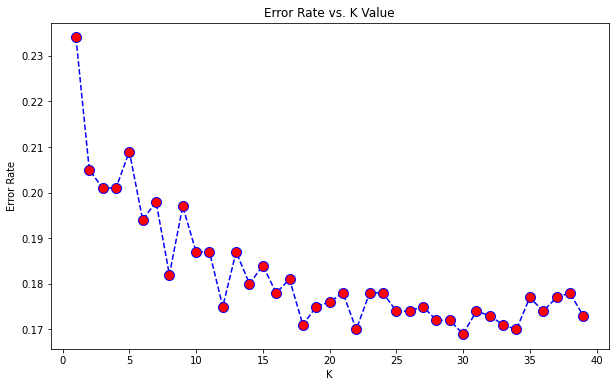

In [400]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# 5. Conclusion

Accuracy of 
Logistic Regression with Label Encoding=0.805
Logistic Regression with One Hot Encoding=0.805
Decision Tree=0.774
Random Forest=0.828
Random Forest With Grid Search=0.844
KNN=0.791

Random Forest Only gives highest Accuracy comparing to all others